Python was not able to load the fast fortran assembly routines.

Python was not able to load the fast fortran material routines.



<IPython.core.display.Javascript object>


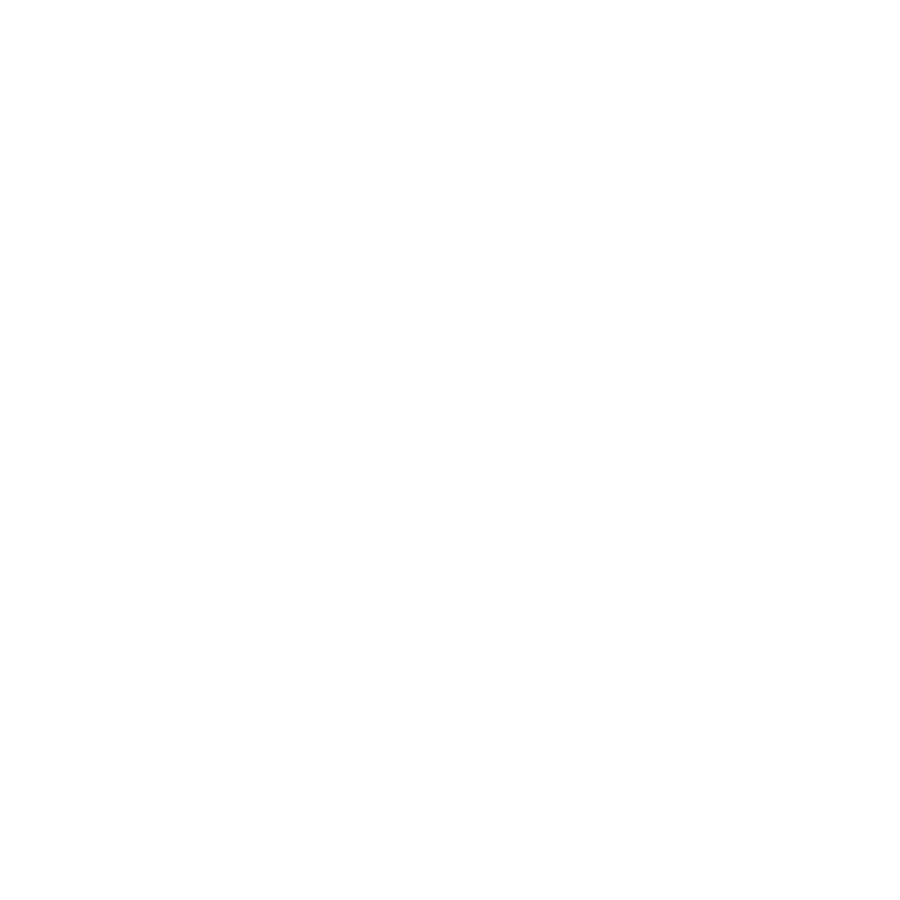

In [1]:
# importing lib and setting a list of meshes to be tested
import sys 
sys.path.append(r'C:\AMfe')

import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
import pandas as pd
import mpl_toolkits.mplot3d as a3
%matplotlib notebook
msh_dict = {}
msh_dict[0] = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_1.msh')
msh_dict[1] = mshfile = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_2.msh')
msh_dict[2] = mshfile = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_3.msh')



domain_id = {}
domain_id[0] = 16
domain_id[1] = 16
domain_id[2] = 16

# select mesh to be plotted
mesh_id1 = 0
mshfile = msh_dict[mesh_id1]

m1 = amfe.Mesh()
m1.import_msh(mshfile)

fig = plt.figure(figsize=(30, 30), dpi= 30, facecolor='w', edgecolor='k')
ax = a3.Axes3D(fig)
ax = amfe.plot3Dmesh(m1,ax,alpha=0.2, plot_nodes=False)
#ax.set_axis_off()
#ax.view_init(90, -90)
ax.set_xlim([-80,80])
ax.set_ylim([90,250])
ax.set_zlim([-80,80])
plt.show()



In [2]:
sys.path.append(r'C:\Projects')

from wrappers.read_abaqus_mesh import *


filepath = r'C:\Projects\data\beampl.inp'
nodes_dict, elem_list, nset_list  = read_inp(filepath)
el_df, node_idx = create_amfe_elem_data_frame(elem_list)
nodes = create_amfe_node_array(nodes_dict)

m2 = amfe.Mesh()
m2.el_df = el_df
m2.node_idx = node_idx
m2.nodes = nodes

TypeError: exceptions must derive from BaseException

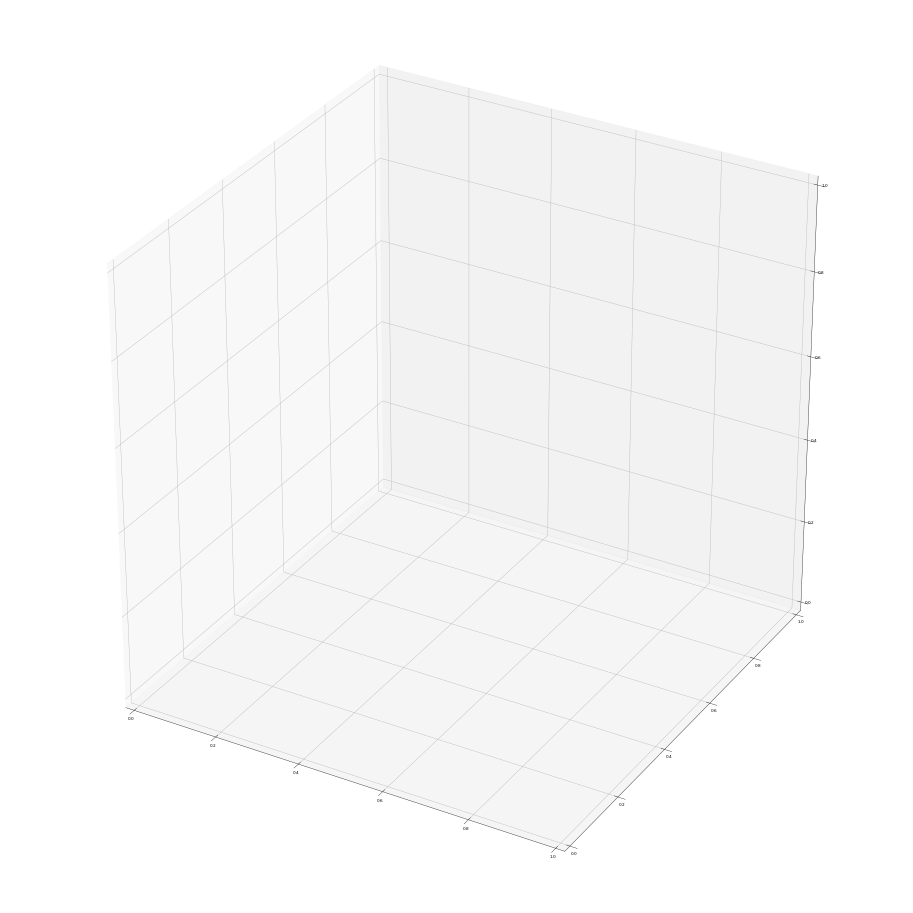

In [3]:
fig = plt.figure(figsize=(30, 30), dpi= 30, facecolor='w', edgecolor='k')
ax = a3.Axes3D(fig)
ax = amfe.plot3Dmesh(m2,ax,alpha=0.2, plot_nodes=False)
#ax.set_axis_off()
#ax.view_init(90, -90)
#ax.set_xlim([-80,80])
#ax.set_ylim([90,250])
#ax.set_zlim([-80,80])
plt.show()

In [4]:
el_df

idx_abaqus el_type no_of_tags phys_group geom_entity no_of_mesh_partitions  \
0           1  Hexa20        NaN         B1         NaN                     1   
1           2  Hexa20        NaN         B1         NaN                     1   
2           3  Hexa20        NaN         B1         NaN                     1   
3           4  Hexa20        NaN         B1         NaN                     1   
4           5  Hexa20        NaN         B1         NaN                     1   
5           6  Hexa20        NaN         B1         NaN                     1   
6           7  Hexa20        NaN         B1         NaN                     1   
7           8  Hexa20        NaN         B1         NaN                     1   
8           9  Hexa20        NaN         B1         NaN                     1   
9          10  Hexa20        NaN         B1         NaN                     1   
10         11  Hexa20        NaN         B1         NaN                     1   
11         12  Hexa20        NaN         B1         NaN                     1   
12         13  Hexa20        NaN         B1         NaN                     1   
13         14  Hexa20        NaN         B1         NaN                     1   
14         15  Hexa20        NaN         B1         NaN                     1   
15         16  Hexa20        NaN         B1         NaN                     1   
16         17  Hexa20        NaN         B1         NaN                     1   
17         18  Hexa20        NaN         B1         NaN                     1   
18         19  Hexa20        NaN         B1         NaN                     1   
19         20  Hexa20        NaN         B1         NaN                     1   
20         21  Hexa20        NaN         B1         NaN                     1   
21         22  Hexa20        NaN         B1         NaN                     1   
22         23  Hexa20        NaN         B1         NaN                     1   
23         24  Hexa20        NaN         B1         NaN                     1   
24         25  Hexa20        NaN         B1         NaN                     1   
25         26  Hexa20        NaN         B1         NaN                     1   
26         27  Hexa20        NaN         B1         NaN                     1   
27         28  Hexa20        NaN         B1         NaN                     1   
28         29  Hexa20        NaN         B1         NaN                     1   
29         30  Hexa20        NaN         B1         NaN                     1   
30         31  Hexa20        NaN         B1         NaN                     1   
31         32  Hexa20        NaN         B1         NaN                     1   

   partition_id partitions_neighbors    0    1 ...    10   11   12   13   14  \
0             1                  NaN    0    9 ...    93   19  103  219  220   
1             1                  NaN    9    1 ...    95   92  105  132  222   
2             1                  NaN   18   94 ...    16   17  220  223  163   
3             1                  NaN   94   12 ...    14   96  222  134  161   
4             1                  NaN   60  104 ...   220  192  107  225  226   
5             1                  NaN  104   33 ...   222  219  109  136  228   
6             1                  NaN  191  221 ...   163  190  226  229  167   
7             1                  NaN  221  133 ...   161  223  228  138  165   
8             1                  NaN   58  108 ...   226  196  111  231  232   
9             1                  NaN  108   35 ...   228  225  113  140  234   
10            1                  NaN  195  227 ...   167  194  232  235  171   
11            1                  NaN  227  137 ...   165  229  234  142  169   
12            1                  NaN   56  112 ...   232  200  115  237  238   
13            1                  NaN  112   37 ...   234  231  117  144  240   
14            1                  NaN  199  233 ...   171  198  238  241  175   
15            1                  NaN  233  141 ..

In [5]:
# creating a mechanical component
my_comp = amfe.MechanicalSystem()

# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3,  plane_stress=False)

# setting mesh object and selecting problem domain
my_comp.set_mesh_obj(m2)
domain = my_comp.set_domain('B1',my_material)




Preallocating the stiffness matrix
Done preallocating stiffness matrix with 32 elements and 0 dofs.
Time taken for preallocation: 0.00 seconds.


In [6]:
K, f = my_comp.assembly_class.assemble_k_and_f()

IndexError: arrays used as indices must be of integer (or boolean) type